In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [103]:
df = pd.read_csv(r"C:\Users\lrd\Desktop\kaggle\house_price\train.csv")

In [23]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
for col_name in df.select_dtypes(exclude=['number']).columns:
    print(col_name,": ", df[col_name].unique())

MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street :  ['Pave' 'Grvl']
Alley :  [nan 'Grvl' 'Pave']
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities :  ['AllPub' 'NoSeWa']
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope :  ['Gtl' 'Mod' 'Sev']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'

In [78]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [104]:
#把这俩合成一下 其余不管
df[-df['Fence'].isnull() & -df['PoolQC'].isnull()]['SalePrice']#.describe()

197     235000
810     181000
1170    171000
1182    745000
1386    250000
1423    274970
Name: SalePrice, dtype: int64

In [4]:
for col in df.columns[df.isnull().any()]:
    if df[col].isnull().sum()/1460 > 0.1:
        print(col,df[col].isnull().sum()/1460)

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
FireplaceQu 0.4726027397260274
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [5]:
for col in df.columns[df.isnull().any()]:
    if df[col].isnull().sum()/1460 > 0.1:
        print(col,df[col].isnull().sum()/1460)

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
FireplaceQu 0.4726027397260274
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [6]:
lst = []
for col in df.columns[df.isnull().any()]:
    if df[col].isnull().sum()/1460 <= 0.1:
        lst.append(col)
df[lst]

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


In [105]:
df['new_feature'] = 0
df['new_feature'][-df['Fence'].isnull() & -df['PoolQC'].isnull()] = 1
df = df.drop(columns = ['Fence','Alley','PoolQC','MiscFeature'])

C:\Users\lrd\AppData\Local\Temp\ipykernel_9372\1120509997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_feature'][-df['Fence'].isnull() & -df['PoolQC'].isnull()] = 1


In [106]:
def trans_FireplaceQu(x):
    if x == 'Ex':
        return 2
    if x in ['Gd','TA']:
        return 1
    else:
        return 0
df['FireplaceQu'] = df['FireplaceQu'].apply(trans_FireplaceQu)

In [107]:
df['TotalSF']=df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
df['Age']=df['YrSold']-df['YearBuilt']
df['RemodelAge']=df['YearRemodAdd']!=df['YearBuilt'].astype(int)

In [111]:
df['MSZoning'].cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [112]:
for col in df.select_dtypes(exclude=['number']).columns:
    print(col)
    df[col] = df[col].astype('category').cat.codes

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition
RemodelAge


In [65]:
df.corr()['SalePrice'].abs()> 0.05  

Id               False
MSSubClass        True
MSZoning          True
LotFrontage       True
LotArea           True
                 ...  
YrSold           False
SaleType          True
SaleCondition     True
SalePrice         True
new_feature       True
Name: SalePrice, Length: 78, dtype: bool

In [113]:
idx_lst = []
for idx in df.corr()['SalePrice'].index:
    if df.corr()['SalePrice'].abs()[idx] >0.05:
        idx_lst.append(idx)

In [114]:
df = df[idx_lst]
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,new_feature,TotalSF,Age
0,60,3,65.0,8450,3,4,0,5,2,0,...,61,0,0,0,8,4,208500,0,2566,5
1,20,3,80.0,9600,3,2,0,24,1,0,...,0,0,0,0,8,4,181500,0,2524,31
2,60,3,68.0,11250,0,4,0,5,2,0,...,42,0,0,0,8,4,223500,0,2706,7
3,70,3,60.0,9550,0,0,0,6,2,0,...,35,272,0,0,8,0,140000,0,2473,91
4,60,3,84.0,14260,0,2,0,15,2,0,...,84,0,0,0,8,4,250000,0,3343,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,3,4,0,8,2,0,...,40,0,0,0,8,4,175000,0,2600,8
1456,20,3,85.0,13175,3,4,0,14,2,0,...,0,0,0,0,8,4,210000,0,3615,32
1457,70,3,66.0,9042,3,4,0,6,2,0,...,60,0,0,0,8,4,266500,0,3492,69
1458,20,3,68.0,9717,3,4,0,12,2,0,...,0,112,0,0,8,4,142125,0,2156,60


In [115]:
df[df.select_dtypes(exclude=['number']).columns] = df.select_dtypes(exclude=['number']).astype('category')
for col in df.select_dtypes(exclude=['number']).columns:
    df[col] = df[col].cat.codes
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[df.columns[0:-4].append(pd.Index(['new_feature','TotalSF','Age']))]
y = np.log(df['SalePrice'])

In [157]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
# 定义 KFold 参数
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
params = {
    'booster': 'gbtree',
    'verbosity': 0,
    'nthread': 3,
    'disable_default_eval_metric': 1,
    'eta': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 1.,
    'lambda': 3,
    'alpha': 1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
}

# 交叉验证
rmses = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 构建 DMatrix 数据对象
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_train = X_train.fillna(X_train.mode())
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    X_test = X_test.fillna(X_train.mode())
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # 训练模型
    model = xgb.train(params,dtrain,num_boost_round=150)
    
    # 预测并计算均方根误差
    y_pred = model.predict(dtest)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmses.append(rmse)

# 输出交叉验证的均方根误差
print("交叉验证的均方根误差：", rmses)
print("均方根误差的平均值：", np.mean(rmses))

交叉验证的均方根误差： [0.13953000315152034, 0.12296134901795347, 0.13953613861190806, 0.1319585480444994, 0.11390455351264062]
均方根误差的平均值： 0.12957811846770437


In [158]:
df1 = pd.read_csv(r"C:\Users\lrd\Desktop\kaggle\house_price\test.csv")

In [159]:
df1['new_feature'] = 0
df1['new_feature'][-df1['Fence'].isnull() & -df1['PoolQC'].isnull()] = 1
df1 = df1.drop(columns = ['Fence','Alley','PoolQC','MiscFeature'])

C:\Users\lrd\AppData\Local\Temp\ipykernel_9372\2109061708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_feature'][-df1['Fence'].isnull() & -df1['PoolQC'].isnull()] = 1


In [160]:
df1['TotalSF']=df1['TotalBsmtSF']+df1['1stFlrSF']+df1['2ndFlrSF']
df1['Age']=df1['YrSold']-df1['YearBuilt']
df1['RemodelAge']=df1['YearRemodAdd']!=df1['YearBuilt'].astype(int)

In [161]:
def trans_FireplaceQu(x):
    if x == 'Ex':
        return 2
    if x in ['Gd','TA']:
        return 1
    else:
        return 0
df1['FireplaceQu'] = df1['FireplaceQu'].apply(trans_FireplaceQu)

In [162]:
df1[df1.select_dtypes(exclude=['number']).columns] = df1.select_dtypes(exclude=['number']).astype('category')
for col in df1.select_dtypes(exclude=['number']).columns:
    df1[col] = df1[col].cat.codes
# X1 = pd.DataFrame(scaler.transform(X), columns=X.columns)
# idx_lst.pop(-4)

In [163]:
X1 = df1[X.columns]

In [164]:
X1

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,new_feature,TotalSF,Age
0,20,2,80.0,11622,3,4,0,12,1,0,...,140,0,0,120,0,8,4,0,1778.0,49
1,20,3,81.0,14267,0,0,0,12,2,0,...,393,36,0,0,0,8,4,0,2658.0,52
2,60,3,74.0,13830,0,4,0,8,2,0,...,212,34,0,0,0,8,4,0,2557.0,13
3,60,3,78.0,9978,0,4,0,8,2,0,...,360,36,0,0,0,8,4,0,2530.0,12
4,120,3,43.0,5005,0,4,0,22,2,4,...,0,82,0,144,0,8,4,0,2560.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,3,4,0,10,2,3,...,0,0,0,0,0,8,4,0,1638.0,36
1455,160,4,21.0,1894,3,4,0,10,2,4,...,0,24,0,0,0,8,0,0,1638.0,36
1456,20,3,160.0,20000,3,4,0,11,2,0,...,474,0,0,0,0,8,0,0,2448.0,46
1457,85,3,62.0,10441,3,4,0,11,2,0,...,80,32,0,0,0,8,4,0,1882.0,14


In [165]:
dtest1 = xgb.DMatrix(X1)

In [166]:
y1 = model.predict(dtest1)

<AxesSubplot:>

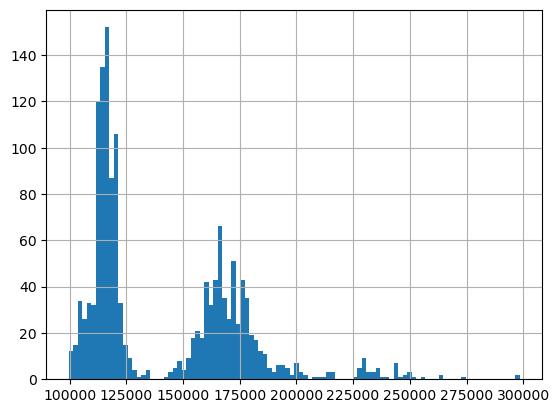

In [167]:
#np.exp(y).hist(bins=100)
pd.Series(np.exp(y1)).hist(bins=100)

In [152]:
result = pd.DataFrame()

In [153]:
result['Id'] = df1['Id']

In [154]:
result['SalePrice'] = np.exp(y1)

In [155]:
result.to_csv(r'C:\Users\lrd\Desktop\kaggle\house_price\result.csv',index = False)

In [246]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,new_feature
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,120,0,0,6,2010,8,4,0
1,1462,20,3,81.0,14267,1,0,3,0,0,...,0,0,0,0,12500,6,2010,8,4,0
2,1463,60,3,74.0,13830,1,0,3,0,4,...,0,0,0,0,0,3,2010,8,4,0
3,1464,60,3,78.0,9978,1,0,3,0,4,...,0,0,0,0,0,6,2010,8,4,0
4,1465,120,3,43.0,5005,1,0,1,0,4,...,0,0,144,0,0,1,2010,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,0,0,0,6,2006,8,4,0
1455,2916,160,4,21.0,1894,1,3,3,0,4,...,0,0,0,0,0,4,2006,8,0,0
1456,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,0,0,0,9,2006,8,0,0
1457,2918,85,3,62.0,10441,1,3,3,0,4,...,0,0,0,0,700,7,2006,8,4,0
